In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv(r'D:\Intellipat\DL\Assignment\Assignment-4\diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
360,5,189,64,33,325,31.2,0.583,29,1
302,5,77,82,41,42,35.8,0.156,35,0
475,0,137,84,27,0,27.3,0.231,59,0
597,1,89,24,19,25,27.8,0.559,21,0
739,1,102,74,0,0,39.5,0.293,42,1


In [3]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Visualization

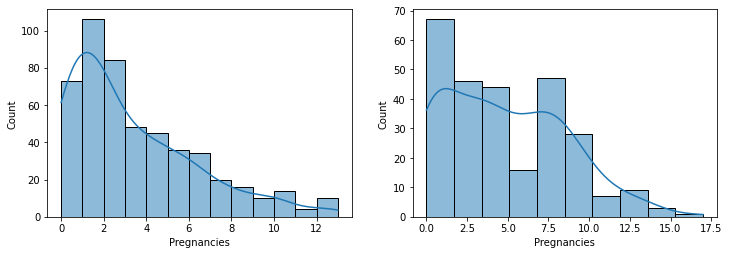

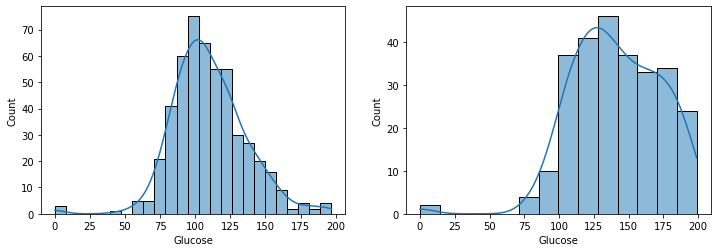

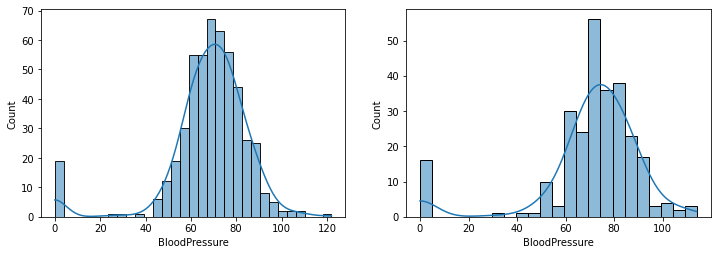

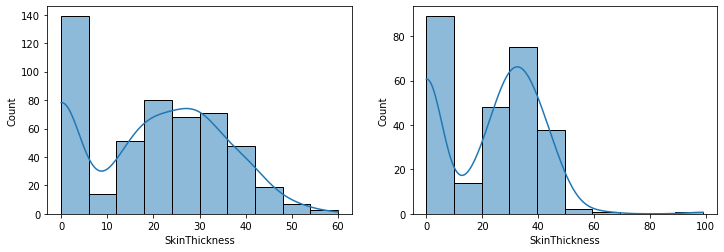

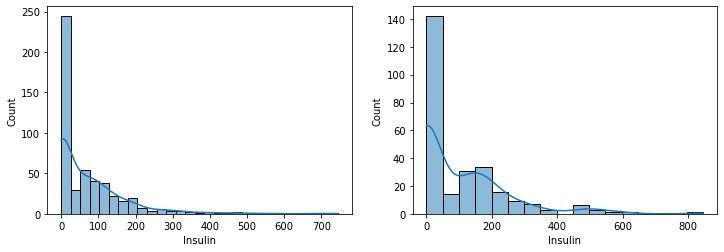

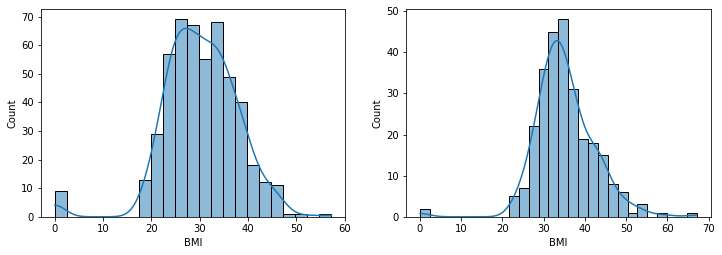

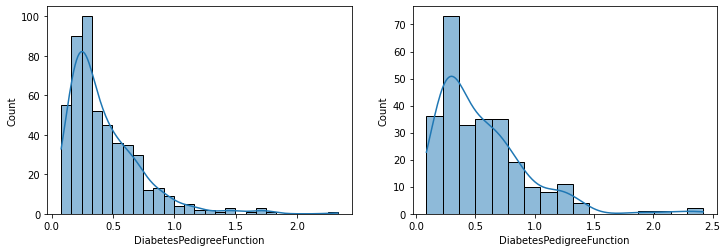

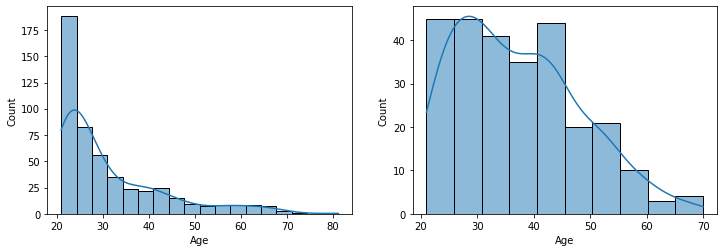

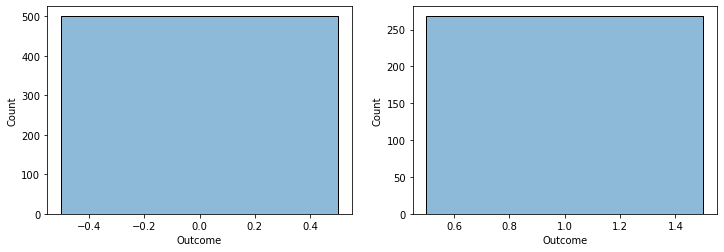

In [7]:
j=1
# plt.figure(figsize=(12,45))
for i in df.columns:
    plt.figure(figsize=(12,45))
    plt.subplot(10,2,1)
    sns.histplot(df[f'{i}'][df['Outcome']==0],kde=True)#,hue=df.Outcome)
#     plt.show()
    j=j+1
#     plt.figure(figsize=(12,45))    
    plt.subplot(10,2,2)
    sns.histplot(df[f'{i}'][df['Outcome']==1],kde=True)#,hue=df.Outcome)
    plt.show()
    j=j+1

# Preprocessing

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.9,random_state=0,stratify=df.Outcome)

In [9]:
from imblearn.over_sampling import ADASYN,SMOTEN

In [10]:
ada = ADASYN(random_state=0,n_neighbors=15)

In [11]:
x_train_resample,y_train_resample = ada.fit_resample(x_train,y_train)

In [12]:
smotenn = SMOTEN(random_state=0,k_neighbors=15)

In [13]:
x_train_resample,y_train_resample = smotenn.fit_resample(x_train,y_train)

In [14]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)

In [15]:
x_train_resample,y_train_resample = smoteenn.fit_resample(x_train,y_train)

In [16]:
x_train_resample.shape

(441, 8)

In [17]:
y_train_resample.shape

(441,)

In [18]:
y_train_resample.value_counts()

1    244
0    197
Name: Outcome, dtype: int64

In [19]:
ss = StandardScaler()
x_train_resample = ss.fit_transform(x_train_resample)

# Machine Learning

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [21]:
rfc.fit(x_train_resample,y_train_resample)

RandomForestClassifier()

In [22]:
rfc.score(x_test,y_test)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.35064935064935066

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
rfc.score(x_test,y_test)

0.8571428571428571

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(x_train_resample,y_train_resample)

DecisionTreeClassifier()

In [27]:
dtc.score(x_test,y_test)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.35064935064935066

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
dtc.score(x_test,y_test)

0.7012987012987013

# Deep Learning

In [30]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.9,random_state=0)

In [31]:
x_train_resample,y_train_resample = smoteenn.fit_resample(x_train,y_train)

In [32]:
x_train = ss.fit_transform(x_train)
x_train_resample = ss.fit_transform(x_train_resample)
x_test = ss.fit_transform(x_test)
y_train_resample = pd.get_dummies(y_train_resample)

In [33]:
xn_train,xn_test,yn_train,yn_test = train_test_split(df[['Pregnancies','Glucose','BloodPressure']],df.iloc[:,-1],train_size=0.9,random_state=0,stratify=df.Outcome)

In [34]:
xn_train_resample,yn_train_resample = smoteenn.fit_resample(xn_train,yn_train)
xn_train_resample = ss.fit_transform(xn_train_resample)
yn_train_resample = pd.get_dummies(yn_train_resample)
xn_test = ss.fit_transform(xn_test)

In [35]:
yn_train.value_counts()

0    450
1    241
Name: Outcome, dtype: int64

In [36]:
yn_train_resample[0].value_counts()

0    222
1    201
Name: 0, dtype: int64

## QA. Build a sequential model using Keras on top of this Diabetes dataset to find out if the patient has diabetes or not, using ‘Pregnancies’, ‘Glucose’ & ‘BloodPressure’ as independent columns.
    1. This model should have 1 hidden layer with 8 nodes
    2. Use Stochastic Gradient as the optimization algorithm
    3. Fit the model, with number of epochs to be 100 and batch size to be 10

In [36]:
# del model

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(3,name='Input'))
model.add(tf.keras.layers.Dense(8, activation='relu', name = 'Hidden_Layer_1'))
model.add(tf.keras.layers.Dense(2, activation='softmax', name = 'Output_Layer'))
# model.add(tf.keras.layers.Dropout(0.3,name='Droputs'))
model.summary()

model.compile(optimizer= tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.binary_crossentropy,
             metrics= ['acc'])

model.fit(x=xn_train_resample,y=yn_train_resample,batch_size=10,epochs=100,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 8)                 32        
                                                                 
 Output_Layer (Dense)        (None, 2)                 18        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 0.6753 - acc: 0.6342 - val_loss: 0.7198 - val_acc: 0.4651
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6474 - acc: 0.7132 - val_loss: 0.7001 - val_acc: 0.7907
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6222 - acc: 0.8421 - val_loss: 0.6816 - val_acc: 0.8140
Epoch 4/100
38/38 [====

Text(0.5, 1.0, 'Loss of Model')

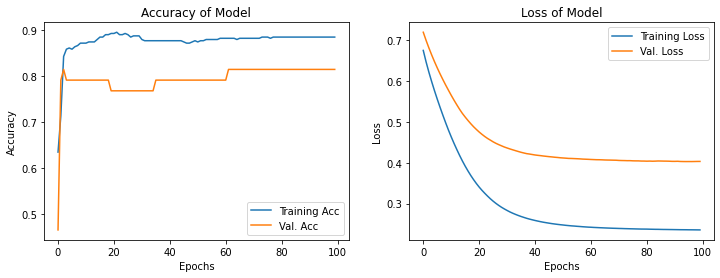

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(model.history.history["acc"], label = "Training Acc")
plt.plot(model.history.history["val_acc"], label = "Val. Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model")
plt.subplot(1,2,2)
plt.plot(model.history.history["loss"], label = "Training Loss")
plt.plot(model.history.history["val_loss"], label = "Val. Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Model")

In [39]:
yn_pred = model.predict(xn_test)
yn_pred = np.argmax(yn_pred,axis=1)
accuracy_score(yn_test,yn_pred)

3/3 [==============================] - 0s 4ms/step


0.7792207792207793

In [40]:
result = pd.DataFrame([np.array(yn_test),np.array(yn_pred)]).T
result = result.rename(columns={ 0 : 'yn_test', 1 : 'yn_pred'} )

result['Error'] = result['yn_test']-result['yn_pred']
result[result['Error'] != 0].Error.count()

17

In [41]:
confusion_matrix(yn_test,yn_pred)

array([[39, 11],
       [ 6, 21]], dtype=int64)

In [42]:
print(classification_report(yn_test,yn_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        50
           1       0.66      0.78      0.71        27

    accuracy                           0.78        77
   macro avg       0.76      0.78      0.77        77
weighted avg       0.79      0.78      0.78        77



## QB. Build another sequential model where ‘Outcome’ is the dependent variable and all other columns are predictors.
        1. This model should have 3 hidden layers with 16 nodes in each layer
        2. Use ‘adam’ as the optimization algorithm
        3. Fit the model, with number of epochs to be 150 and batch size to be 10

In [43]:
del model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(8,name='Input'))
model.add(tf.keras.layers.Dense(16, activation='linear', name = 'Hidden_Layer_1'))
model.add(tf.keras.layers.Dense(16, activation='linear', name = 'Hidden_Layer_2'))
model.add(tf.keras.layers.Dense(16, activation='relu', name = 'Hidden_Layer_3'))
model.add(tf.keras.layers.Dense(2, activation='softmax', name = 'Output_Layer'))
model.add(tf.keras.layers.Dropout(0.35,name='Droputs'))
model.summary()
model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.binary_crossentropy,
             metrics= ['acc'])

model.fit(x=x_train_resample,y=y_train_resample,batch_size=10,epochs=150,validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                144       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 16)                272       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 16)                272       
                                                                 
 Output_Layer (Dense)        (None, 2)                 34        
                                                                 
 Droputs (Dropout)           (None, 2)                 0         
                                                                 
Total params: 722 (2.82 KB)
Trainable params: 722 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
42/42 [=====

Text(0.5, 1.0, 'Loss of Model')

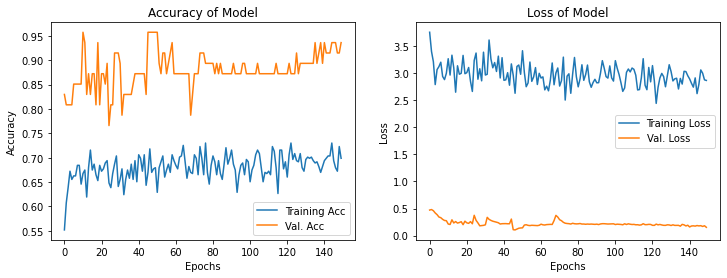

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(model.history.history["acc"], label = "Training Acc")
plt.plot(model.history.history["val_acc"], label = "Val. Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model")
plt.subplot(1,2,2)
plt.plot(model.history.history["loss"], label = "Training Loss")
plt.plot(model.history.history["val_loss"], label = "Val. Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Model")

In [45]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [46]:
y_pred = np.argmax(y_pred,axis=1)

In [47]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [48]:
result = pd.DataFrame([np.array(y_test),np.array(y_pred)]).T
result = result.rename(columns={ 0 : 'y_test', 1 : 'y_pred'} )

In [49]:
result['Error'] = result['y_test']-result['y_pred']
result[result['Error'] != 0].Error.count()

22

In [50]:
confusion_matrix(y_test,y_pred)

array([[34, 17],
       [ 5, 21]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76        51
           1       0.55      0.81      0.66        26

    accuracy                           0.71        77
   macro avg       0.71      0.74      0.71        77
weighted avg       0.76      0.71      0.72        77

